In [54]:
import torch
from sklearn.datasets import make_circles

# Data

In [55]:
n_samples = 1000

X,Y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42
                    )

In [56]:
len(X), len(Y)

(1000, 1000)

In [57]:
# First examples
print(f'first samples of x : {X[:5]}')
print(f'first samples of y : {Y[:5]}')

first samples of x : [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first samples of y : [1 1 1 1 0]


In [58]:
import pandas as pd

In [59]:
X[:,0]

array([ 7.54246251e-01, -7.56158882e-01, -8.15391934e-01, -3.93730729e-01,
        4.42207645e-01, -4.79646368e-01, -1.36483595e-02,  7.71513274e-01,
       -1.69322340e-01, -1.21485796e-01, -6.42490416e-01,  5.69466604e-01,
       -1.17735911e-01,  7.34100038e-01,  6.00776333e-01,  1.90225707e-01,
       -9.36951846e-01,  1.07061696e-01, -8.18913619e-01, -6.42100130e-01,
        6.26827199e-01, -5.62291360e-01, -2.12666579e-02,  7.39770578e-01,
       -9.09048393e-01, -9.36994111e-01,  2.86615780e-01,  8.26260717e-01,
        2.53433397e-01,  6.57946255e-01, -3.14834779e-01, -2.23989601e-01,
        8.44389246e-03,  1.00503887e+00, -8.95158198e-02, -7.88574473e-01,
       -5.68205362e-01,  4.47646782e-01,  2.63260719e-01,  7.45020435e-01,
       -5.97118971e-01,  3.61928379e-01, -7.14242507e-01,  8.33839377e-01,
       -8.33981856e-01, -9.10860642e-01,  4.87625557e-01,  2.30736878e-01,
        7.58412791e-01, -4.12746839e-01,  4.76176622e-01,  3.99958509e-02,
       -9.66328252e-01,  

In [60]:
circles = pd.DataFrame({"X1":X[:,0], 
                        "X2": X[:,1],
                        "label":Y}
                        )
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [61]:
import matplotlib.pyplot as plt

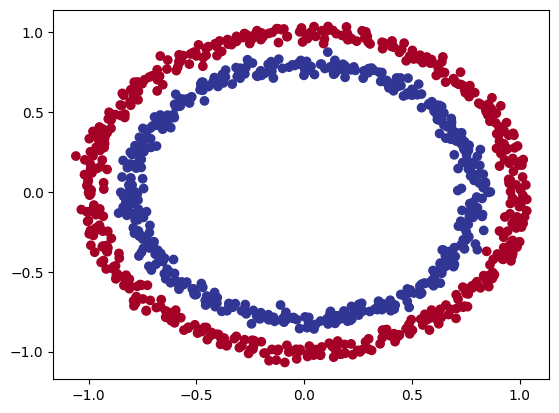

In [62]:
plt.scatter(x=X[:,0],y=X[:,1],c=Y,cmap=plt.cm.RdYlBu)

## Input output shape checking

In [63]:
X.shape, Y.shape

((1000, 2), (1000,))

In [64]:
x_sample, y_sample = X[0],Y[0]

print(f'sample for x : {x_sample} and for y : {y_sample}')
print(f'shape of the sample x : {x_sample.shape} and y : {y_sample.shape}')

sample for x : [0.75424625 0.23148074] and for y : 1
shape of the sample x : (2,) and y : ()


## turning into tensors

In [65]:
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

In [66]:
type(X),type(Y), X.dtype, Y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

## Splitting data into training  and testing

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [68]:
len(X_train) , len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# model

In [69]:
# Device agnostic code for GPU utilization

device = "cuda" if  torch.cuda.is_available() else "cpu"
print(f'device : {device}')

device : cuda


In [70]:
from torch import nn

In [71]:
X_train.shape

torch.Size([800, 2])

In [72]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=1)

        # self.two_linear_layers = nn.Sequential(
        #     nn.Linear(in_features=2, out_features=5),
        #     nn.Linear(in_features=5, out_features=1)
        # )
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.layer2(self.layer1(x)) # x -> layer1 -> layer2
        # return self.two_linear_layers(x)
    
model_0 = CircleModelV1().to(device=device)

In [73]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer2.bias', tensor([-0.2060], device='cuda:0'))])

In [74]:
# Replicating the above nn
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
    ).to(device=device)

In [75]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [76]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [77]:
with torch.inference_mode():
    untrained_model = model_0(X_test.to(device))

print(f'lenfth of test samples  : {len(X_test)} Shape : {X_test.shape}')
print(f'Sample output of untrained model: {len(untrained_model)} Shape : {untrained_model.shape}')
print(f'First 10 predictions: \n {torch.round(untrained_model[:10])}')
print(f'first 10 labels : \n {y_test[:10]}')


lenfth of test samples  : 200 Shape : torch.Size([200, 2])
Sample output of untrained model: 200 Shape : torch.Size([200, 1])
First 10 predictions: 
 tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')
first 10 labels : 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [78]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## Setup loss function and optimizer according to the problem
#### Most common Loss fun's
 * for **Regression** -> MAE / MSE
 * For **Classification** -> Binary cross entropy / categorical cross entropy(cross entropy)
 * We are using `torch.nn.BCEWithLogitLoss`, 
 As our problem is binary classification we need **BCE** as loss function and **Sigmoid** activation function so `torch.nn.BCEWithLogitLoss` combines both of these and provide numerical stability ~~more than plain combination of **BCE** and **Sigmoid**~~
#### Most common Optimizers
 - SGD
 - Adam

In [79]:
list(model_0.parameters())

[Parameter containing:
 tensor([[-0.0829, -0.2872],
         [ 0.4691, -0.5582],
         [-0.3260, -0.1997],
         [-0.4252,  0.0667],
         [-0.6984,  0.6386]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([-0.1213], device='cuda:0', requires_grad=True)]

In [80]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [81]:
# Calculate Accuracy
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

# Train Model
Training Loop
1. Forward Pass
2. Calculate the loss
3. optimizer zero grad
4. loss backward(Backpropogation)
5. Optimizer step (gradient descent)

## Raw logits -> prediction probabilities -> prediction labels
* Our model output will be raw logits
* and the Raw logits will be feeded to the activation function(sigmoid for binary classificationi and softmax for multiclass classification) to find the prediction probabilities 
* then we will convert the probabilties to labels by finding the max of them in multiclass and rounding for binary classification

In [82]:
# View first 5 outputs of the forward pass the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

The `y_logits` are not yet the label so we are using a sigmoid activation to find predictioin probabilities and rounding the output

In [83]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [84]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)))[:5])

In [85]:
y_pred_labels, y_preds

(tensor([[0.],
         [0.],
         [1.],
         [0.],
         [1.]], device='cuda:0', grad_fn=<RoundBackward0>),
 tensor([[0.],
         [0.],
         [1.],
         [0.],
         [1.]], device='cuda:0'))

In [86]:
y_preds.squeeze()

tensor([0., 0., 1., 0., 1.], device='cuda:0')

## Building Training and testing loop

In [87]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


In [88]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):
    model_0.train()

    y_logits = model_0(X_train).squeeze()

    yPreds = torch.round(torch.sigmoid(y_logits))
    # loss_fn expects the logits
    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_true=y_train, y_pred=yPreds)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

    if epoch % 10 == 0:
        print(f'epoch : {epoch} | acc : {acc:.2f}% |  loss : {loss:.5f} | test acc : {test_acc:.2f}% | test loss : {test_loss:.5f}')

epoch : 0 | acc : 51.88% |  loss : 0.69796 | test acc : 58.00% | test loss : 0.69440
epoch : 10 | acc : 51.25% |  loss : 0.69590 | test acc : 53.00% | test loss : 0.69305
epoch : 20 | acc : 51.62% |  loss : 0.69490 | test acc : 49.50% | test loss : 0.69254
epoch : 30 | acc : 51.12% |  loss : 0.69435 | test acc : 49.50% | test loss : 0.69236
epoch : 40 | acc : 50.88% |  loss : 0.69401 | test acc : 51.00% | test loss : 0.69232
epoch : 50 | acc : 50.25% |  loss : 0.69378 | test acc : 50.00% | test loss : 0.69234
epoch : 60 | acc : 50.00% |  loss : 0.69362 | test acc : 51.50% | test loss : 0.69239
epoch : 70 | acc : 50.25% |  loss : 0.69351 | test acc : 51.00% | test loss : 0.69246
epoch : 80 | acc : 49.88% |  loss : 0.69342 | test acc : 50.00% | test loss : 0.69254
epoch : 90 | acc : 49.88% |  loss : 0.69336 | test acc : 53.00% | test loss : 0.69262


# Making predictions and visualizing them

In [89]:
from pathlib import Path
import requests

# Downloading helper functions
if Path('helper_functions.py').is_file():
    print("Functions already exist")
else:
    print("Downloading helper functions....")
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py','wb') as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Functions already exist


In [90]:
!nvidia-smi

Sun Aug 13 20:23:52 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.86.05              Driver Version: 535.86.05    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650        Off | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P0              14W /  50W |    629MiB /  4096MiB |     32%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

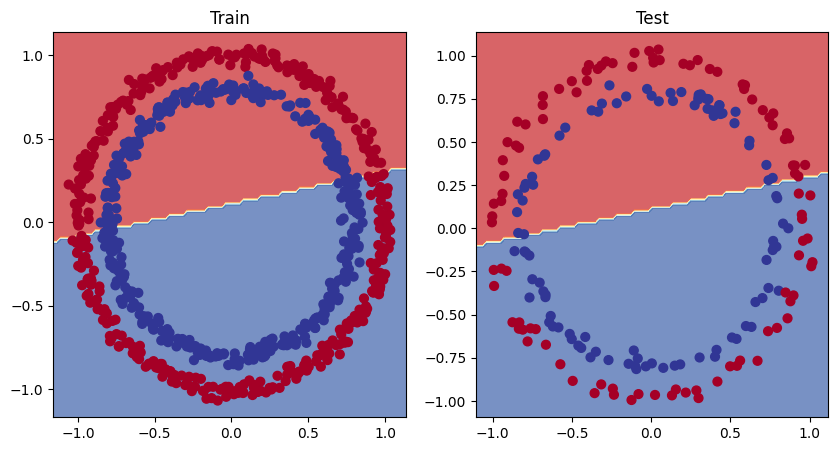

In [91]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_0, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_0, X=X_test, y=y_test)

# Improving the model(from the model perspective)

* Adding more layers
* Adding more hidden units (maybe 5 to 10)
* fit for long (more epochs)
* Changing the activation function
* Change the learning rate
* Change the loss function

These options reffered to as **HyperParameters**

These methods directly dealing with the **model** rather than the data


In [92]:
class CircleModelV2(nn.Module):
    def __init__(self,) -> None:
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)

    def forward(self,x):
        # z = self.layer1(x)
        # z = self.layer2(z)
        # z = self.layer3(z)
        # return z
        return self.layer3(self.layer2(self.layer1(x)))

model_1 = CircleModelV2().to(device)
model_1

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [93]:
model_1.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, 

In [94]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [95]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test =y_train.to(device), y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    y_logits = model_1(X_train).squeeze()

    yPreds = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_true=y_train, y_pred=yPreds)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()

    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()

        test_preds = torch.round(torch.sigmoid(test_logits))
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

        test_loss = loss_fn(test_logits, y_test)
    
    if epoch % 10 == 0:
        print(f'epoch : {epoch} | acc : {acc:.2f}% | loss : {loss:.5f} | test acc : {test_acc:.2f}% | test loss : {test_loss:.5f}')


epoch : 0 | acc : 50.88% | loss : 0.69396 | test acc : 51.00% | test loss : 0.69261
epoch : 10 | acc : 50.25% | loss : 0.69369 | test acc : 50.00% | test loss : 0.69270
epoch : 20 | acc : 50.12% | loss : 0.69351 | test acc : 49.50% | test loss : 0.69283
epoch : 30 | acc : 50.50% | loss : 0.69339 | test acc : 48.00% | test loss : 0.69297
epoch : 40 | acc : 50.38% | loss : 0.69329 | test acc : 49.00% | test loss : 0.69310
epoch : 50 | acc : 49.88% | loss : 0.69322 | test acc : 50.00% | test loss : 0.69324
epoch : 60 | acc : 49.38% | loss : 0.69317 | test acc : 51.50% | test loss : 0.69336
epoch : 70 | acc : 49.38% | loss : 0.69312 | test acc : 50.50% | test loss : 0.69348
epoch : 80 | acc : 50.12% | loss : 0.69309 | test acc : 50.00% | test loss : 0.69359
epoch : 90 | acc : 50.50% | loss : 0.69307 | test acc : 48.50% | test loss : 0.69370
epoch : 100 | acc : 50.38% | loss : 0.69305 | test acc : 48.00% | test loss : 0.69379
epoch : 110 | acc : 50.88% | loss : 0.69303 | test acc : 46.50% |

epoch : 550 | acc : 51.00% | loss : 0.69298 | test acc : 46.00% | test loss : 0.69467
epoch : 560 | acc : 51.00% | loss : 0.69298 | test acc : 46.00% | test loss : 0.69467
epoch : 570 | acc : 51.00% | loss : 0.69298 | test acc : 46.00% | test loss : 0.69467
epoch : 580 | acc : 51.00% | loss : 0.69298 | test acc : 46.00% | test loss : 0.69467
epoch : 590 | acc : 51.00% | loss : 0.69298 | test acc : 46.00% | test loss : 0.69468
epoch : 600 | acc : 51.00% | loss : 0.69298 | test acc : 46.00% | test loss : 0.69468
epoch : 610 | acc : 51.00% | loss : 0.69298 | test acc : 46.00% | test loss : 0.69468
epoch : 620 | acc : 51.00% | loss : 0.69298 | test acc : 46.00% | test loss : 0.69468
epoch : 630 | acc : 51.00% | loss : 0.69298 | test acc : 46.00% | test loss : 0.69468
epoch : 640 | acc : 51.00% | loss : 0.69298 | test acc : 46.00% | test loss : 0.69468
epoch : 650 | acc : 51.00% | loss : 0.69298 | test acc : 46.00% | test loss : 0.69468
epoch : 660 | acc : 51.00% | loss : 0.69298 | test acc

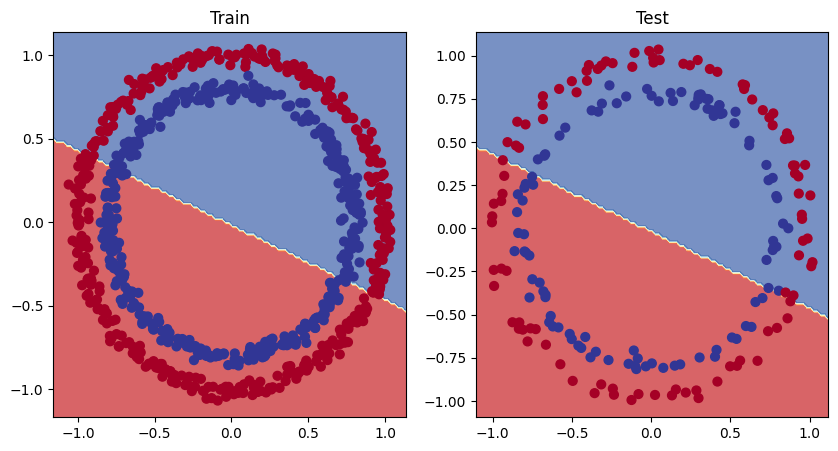

In [96]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_1, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_1, X=X_test, y=y_test)

In [97]:
!nvidia-smi

Sun Aug 13 20:23:55 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.86.05              Driver Version: 535.86.05    CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650        Off | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P0              15W /  50W |    629MiB /  4096MiB |     33%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [98]:
# create some data
weight = 0.7
bias = 0.3
start =0
end =1
step = 0.01

X_regression = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [99]:
# create train and test split
train_split = int(0.8 * len(X_regression))
X_train_regression, X_test_regression = X_regression[:train_split], X_regression[train_split:]
y_train_regression, y_test_regression = y_regression[:train_split], y_regression[train_split:]
len(X_train_regression),len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

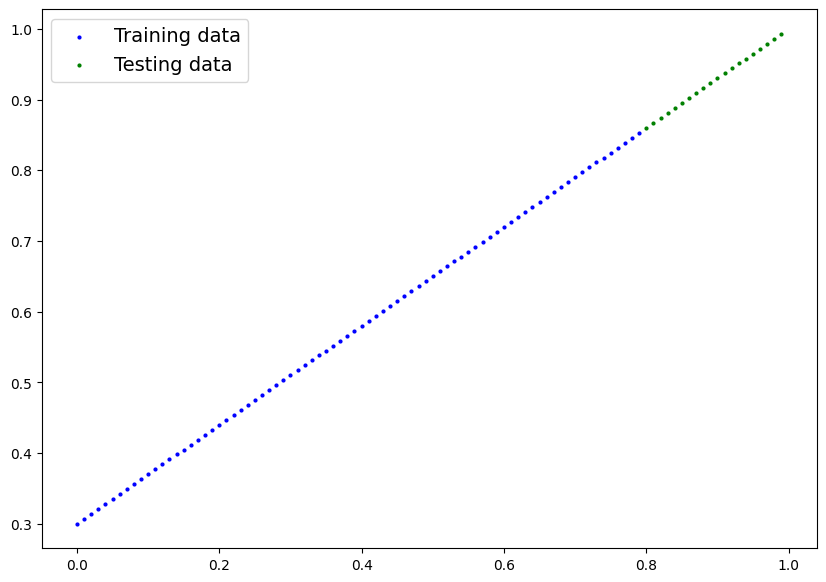

In [100]:
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression, test_data=X_test_regression, test_labels=y_test_regression)

## Adjusting the `model_0` hyperparameters to fit a straight line

In [101]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
)
model_2.to(device)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [102]:
model_2.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.7645],
                      [ 0.8300],
                      [-0.2343],
                      [ 0.9186],
                      [-0.2191],
                      [ 0.2018],
                      [-0.4869],
                      [ 0.5873],
                      [ 0.8815],
                      [-0.7336]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,  0.7709,  0.1478,
                      -0.4668,  0.2549], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
                        0.0298, -0.3123],
                      [ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
         

In [103]:
loss_fn = nn.L1Loss() # MAE
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [104]:

X_train_regression, X_test_regression = X_train_regression.to(device), X_test_regression.to(device)
y_train_regression, y_test_regression = y_train_regression.to(device), y_test_regression.to(device)


In [105]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epoch_count = []
losses = []
test_losses = []

epochs = 1000

for epoch in range(epochs):
    model_2.train()

    y_regression_preds = model_2(X_train_regression)

    loss = loss_fn(y_regression_preds, y_train_regression)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_2.eval()

    with torch.inference_mode():
        test_preds_regression = model_2(X_test_regression)

        test_loss_regression = loss_fn(test_preds_regression, y_test_regression)

    if epoch % 100 == 0:
        epoch_count.append(epoch)
        losses.append(loss)
        test_losses.append(test_loss_regression)

        print(f'epoch : {epoch} | loss : {loss:.4f} | test loss : {test_loss_regression:.4f}')

    

epoch : 0 | loss : 0.7599 | test loss : 0.9110
epoch : 100 | loss : 0.0286 | test loss : 0.0008


epoch : 200 | loss : 0.0253 | test loss : 0.0021
epoch : 300 | loss : 0.0214 | test loss : 0.0031
epoch : 400 | loss : 0.0196 | test loss : 0.0034
epoch : 500 | loss : 0.0194 | test loss : 0.0039
epoch : 600 | loss : 0.0190 | test loss : 0.0038
epoch : 700 | loss : 0.0188 | test loss : 0.0038
epoch : 800 | loss : 0.0184 | test loss : 0.0033
epoch : 900 | loss : 0.0180 | test loss : 0.0036


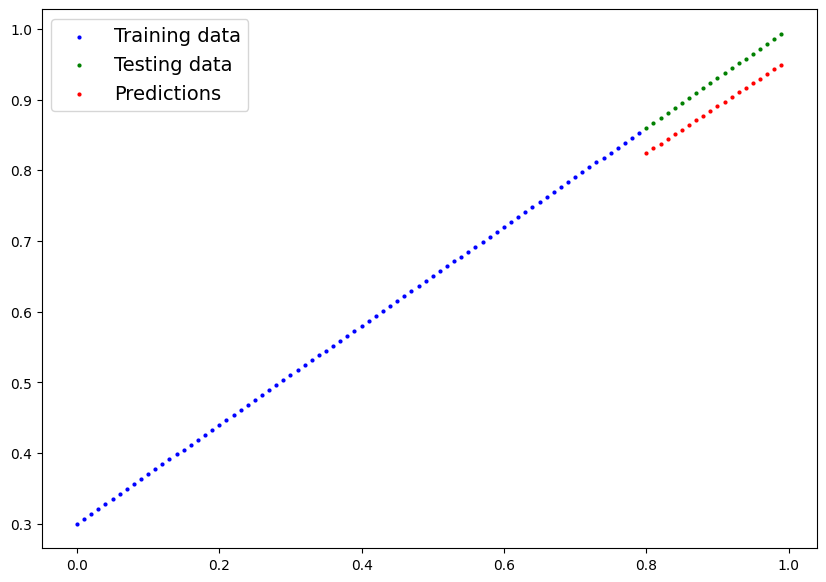

In [106]:
model_2.eval()
with torch.inference_mode():
    yPreds = model_2(X_test_regression)

    plot_predictions(train_data=X_train_regression.cpu(),
                    train_labels=y_train_regression.cpu(),
                    test_data=X_test_regression.cpu(),
                    test_labels=y_test_regression.cpu(),
                    predictions=yPreds.cpu())

# Adding non linearity with non linear functions

Recreating the non linear data

In [107]:
import matplotlib.pyplot as plt
from  sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples=n_samples, noise=0.03,random_state=42)

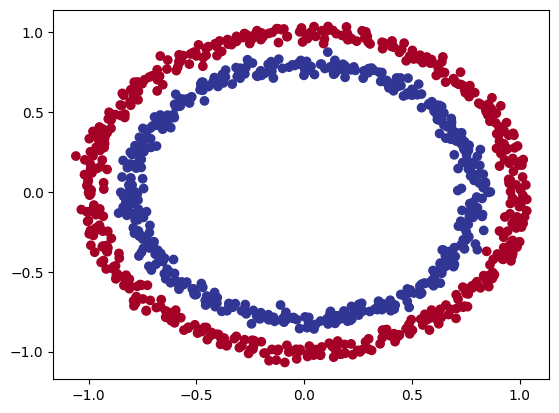

In [109]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [124]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


TypeError: expected np.ndarray (got Tensor)

In [125]:

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

X_train[:5],y_train[:5],X_test[:5],y_test[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]),
 tensor([1., 0., 1., 0., 1.]))

In [126]:
len(X_train),len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)